## Implementing RandomSearchCV without Scikit-Learn

In [11]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
#from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=4400, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

In [13]:
def abc(x_train):
    group=np.split(range(0,len(x_train)),[int(0.33*len(x_train)),int(0.67*len(x_train))])
    p=list(group[0])
    return p

def pqr(x_train):
    group=np.split(range(0,len(x_train)),[int(0.33*len(x_train)),int(0.67*len(x_train))])
    q=list(group[1])
    return q

def xyz(x_train):
    group=np.split(range(0,len(x_train)),[int(0.33*len(x_train)),int(0.67*len(x_train))])
    s=list(group[2])
    return s
    
    

In [4]:
def RandSearch(x_train,y_train,classifier, params, folds):
    trainscores = []
    testscores  = []    
    for k in params:
        trainscores_folds = []
        testscores_folds  = []
        for j in range(0, folds):
            if j==0:
                c=abc(x_train)
                d=pqr(x_train)
                c.extend(d)
                train_indices=c
                test_indices=xyz(x_train)
                X_train = x_train[train_indices]
                Y_train = y_train[train_indices]
                X_test  = x_train[test_indices]
                Y_test  = y_train[test_indices]
                classifier.n_neighbors = k
                classifier.fit(X_train,Y_train)
                Y_predicted = classifier.predict(X_test)
                testscores_folds.append(accuracy_score(Y_test, Y_predicted))
                Y_predicted = classifier.predict(X_train)
                trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
            elif j==1:
                c=abc(x_train)
                d=xyz(x_train)
                c.extend(d)
                train_indices=c
                test_indices=pqr(x_train)
                X_train = x_train[train_indices]
                Y_train = y_train[train_indices]
                X_test  = x_train[test_indices]
                Y_test  = y_train[test_indices]
                classifier.n_neighbors = k
                classifier.fit(X_train,Y_train)
                Y_predicted = classifier.predict(X_test)
                testscores_folds.append(accuracy_score(Y_test, Y_predicted))
                Y_predicted = classifier.predict(X_train)
                trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
            elif j==2:
                c=pqr(x_train)
                d=xyz(x_train)
                c.extend(d)
                train_indices=c
                test_indices=abc(X_train)
                X_train = x_train[train_indices]
                Y_train = y_train[train_indices]
                X_test  = x_train[test_indices]
                Y_test  = y_train[test_indices]
                classifier.n_neighbors = k
                classifier.fit(X_train,Y_train)
                Y_predicted = classifier.predict(X_test)
                testscores_folds.append(accuracy_score(Y_test, Y_predicted))
                Y_predicted = classifier.predict(X_train)
                trainscores_folds.append(accuracy_score(Y_train, Y_predicted)) 
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))       
    return trainscores,testscores            
                
                
                
            
       

            
        
    

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
#import matplotlib.pyplot as plt
import random
#import warnings
#warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()

res=[]
for i in range(10): 
    res.append(random.randint(0, 50))
    c=sorted(res)
    params=tuple(c)
print(params)


folds = 3

trainscores,testscores = RandSearch(X_train, y_train, neigh, params, folds)
print(trainscores)
print(testscores)

(2, 5, 9, 14, 31, 41, 43, 46, 47, 50)
[0.9348893731526026, 0.9236576529656584, 0.9143949673121994, 0.9150025812169638, 0.9089515690601172, 0.9078665442301806, 0.9074165444586068, 0.9075673058033981, 0.907416544458607, 0.9078733970185802]
[0.8618746464440833, 0.9031472576599415, 0.9067368705400671, 0.9077875262538543, 0.9043331542326074, 0.9054005865335615, 0.904518323619213, 0.9055959873813985, 0.9030148755917007, 0.9022637659671607]


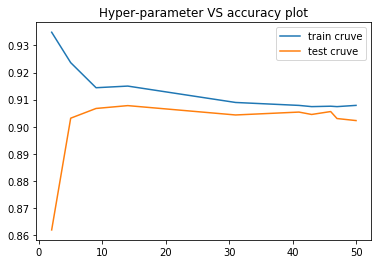

In [15]:
import matplotlib.pyplot as plt
plt.plot(params,trainscores, label='train cruve')
plt.plot(params,testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [16]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

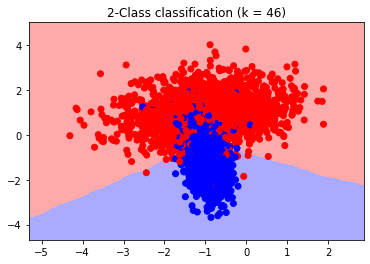

In [17]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 46)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)